## Brief description of the data set
For this project i’m going to use a Data Set representing Heart Attack classfication .Each case
of heart attack has some parameters:
1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 =
asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave
abnormality; 0 = hypertrophy)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 =
downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect
14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status)
(Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)



## Initial plan for data exploration
This analysis is the base step in order to create a model that can predict a heart attack based on
some clinical parameters.
1. Data Overview
2. Data Cleaning and Data Engineering Numerical Data
3. Data Cleaning and Data Engineering Categorical Data
4. Hypothesis Testing

In [2]:
import os
import numpy as np, seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Overview
To better understand the Data Set we need to know if all the columns are correctly name according to
Data Set definition ,visualize all columns data types and the number of rows.

In [ ]:
#importing Heart  Data
Heart_Data = pd.read_csv(r'heart.csv')
Heart_Data

In [3]:
#Initial Exploration
# Number of rows
print(Heart_Data.shape[0])

# Column names
col=Heart_Data.columns.tolist()
print(Heart_Data.columns.tolist())

# Data types
print(Heart_Data.dtypes)


303
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [4]:
#Data Cleaning 
#Check if there are some null values
Heart_Data.isnull().sum().sort_values()
Heart_Data.shape

(303, 14)

## Categorical Data
Even if all values are numeric ,based on our data knowledge we can identify some data that are
Categorical such as RestEcg , Slope,Thall and ChestPain. We need to define some dummy variables
for each of these columns.

In [5]:
# Create dummies variables
#thall column
Heart_Data['thall'].value_counts()
thall_dum=pd.get_dummies(Heart_Data['thall'])

thall_dum = thall_dum.set_axis(['thall_None', 'thall_Fixed_Defect', 'thall_Normal','thall_Reversable'], axis=1)
print(thall_dum)
#Slope column
Heart_Data['slp'].value_counts()
slope_dum=pd.get_dummies(Heart_Data['slp'])

slope_dum = slope_dum.set_axis(['slp_Downsloping', 'slp_Flat', 'slp_Upsloping'], axis=1)
print(slope_dum)
#Chest Pain column
Heart_Data['cp'].value_counts()
chest_pain_dum=pd.get_dummies(Heart_Data['cp'])

chest_pain_dum = chest_pain_dum.set_axis(['cp_asymptomatic', 'cp_typical_angina', 'cp_atypical_angina','cp_no_angina'], axis=1)
print(chest_pain_dum)
#Rest Ecg column
Heart_Data['restecg'].value_counts()
rest_ecg=pd.get_dummies(Heart_Data['restecg'])

rest_ecg = rest_ecg.set_axis(['restecg_hypetrophic', 'restecg_normal', 'restecg_abnormal'], axis=1)
print(rest_ecg)

     thall_None  thall_Fixed_Defect  thall_Normal  thall_Reversable
0             0                   1             0                 0
1             0                   0             1                 0
2             0                   0             1                 0
3             0                   0             1                 0
4             0                   0             1                 0
..          ...                 ...           ...               ...
298           0                   0             0                 1
299           0                   0             0                 1
300           0                   0             0                 1
301           0                   0             0                 1
302           0                   0             1                 0

[303 rows x 4 columns]
     slp_Downsloping  slp_Flat  slp_Upsloping
0                  1         0              0
1                  1         0              0
2                  0  

In [6]:
#Edit Data Frame
Heart_Data_bk=Heart_Data
Heart_Data=Heart_Data.drop(columns=['slp','thall','restecg','cp'])
target=Heart_Data['output']
Heart_Data= Heart_Data.join(rest_ecg)
Heart_Data= Heart_Data.join(chest_pain_dum)
Heart_Data= Heart_Data.join(thall_dum)
Heart_Data= Heart_Data.join(slope_dum)

In [7]:
Heart_Data
y=Heart_Data['output']
fields = list(Heart_Data.drop(columns='output'))  # everything except "output"
correlations = Heart_Data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

cp_asymptomatic       -0.516015
thall_Reversable      -0.486112
exng                  -0.436757
oldpeak               -0.430696
caa                   -0.391724
slp_Flat              -0.362053
sex                   -0.280937
age                   -0.225439
restecg_hypetrophic   -0.159775
trtbps                -0.144931
thall_Fixed_Defect    -0.106589
chol                  -0.085239
restecg_abnormal      -0.068410
slp_Downsloping       -0.063554
fbs                   -0.028046
thall_None            -0.007293
cp_no_angina           0.086957
restecg_normal         0.175322
cp_typical_angina      0.245879
cp_atypical_angina     0.316742
slp_Upsloping          0.394066
thalachh               0.421741
thall_Normal           0.527334
dtype: float64

C:\Users\gdelprat\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

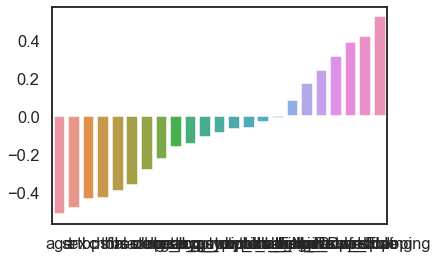

In [8]:
os.chdir(r"C:\Users\gdelprat\OneDrive - Capgemini\Desktop\Corsi\Coursera ML\Supervised_ML_Class\Data")

from colorsetup import colors, palette
sns.set_palette(palette)
sns.set_context('talk')
sns.set_palette(palette)
sns.set_style('white')



#ns.pairplot(Heart_Data)
sns.barplot(fields,correlations)

## Numerical Data
We need to visualize the numerical columns in order to identify the skewed ones.

In [9]:
#Numerical Data
Heart_Data.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,cp_typical_angina,cp_atypical_angina,cp_no_angina,thall_None,thall_Fixed_Defect,thall_Normal,thall_Reversable,slp_Downsloping,slp_Flat,slp_Upsloping
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,0.544554,...,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.498835,...,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Create a functions to plot multiple bar charts
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()



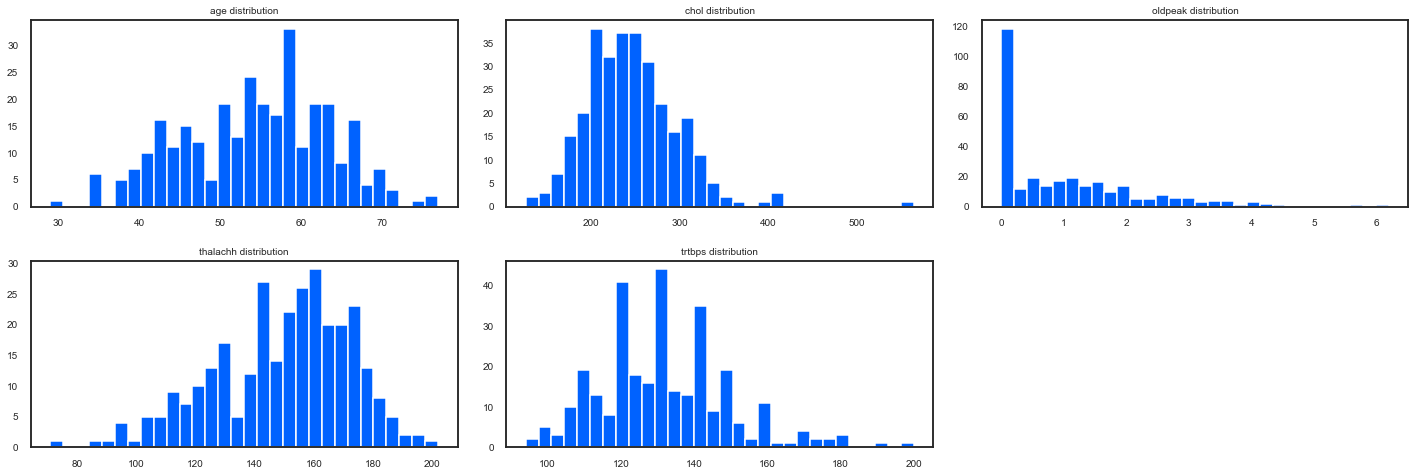

In [11]:
Heart_Data_num=Heart_Data_bk.drop(columns=['slp','thall','restecg','cp','sex','output','caa','exng','fbs'])
hist_loop(data=Heart_Data_num,
          rows=3,
          cols=3,
          figsize=(20,10))

## Log-Transformation
Chol and oldpeak are slightly skewed , oldpeak is very left skewed.
For the skewed ones we apply the log transformation and check for skewness again.


In [12]:
# Perform log transformation
for col in Heart_Data_num.columns.values:
    Heart_Data_num['log_' + col] = Heart_Data_num[col].apply(np.log1p)
Heart_Data_num

,age,trtbps,chol,thalachh,oldpeak,log_age,log_trtbps,log_chol,log_thalachh,log_oldpeak
0,63,145,233,150,2.3,4.158883,4.983607,5.455321,5.017280,1.193922
1,37,130,250,187,3.5,3.637586,4.875197,5.525453,5.236442,1.504077
2,41,130,204,172,1.4,3.737670,4.875197,5.323010,5.153292,0.875469
3,56,120,236,178,0.8,4.043051,4.795791,5.468060,5.187386,0.587787
4,57,120,354,163,0.6,4.060443,4.795791,5.872118,5.099866,0.470004
...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,4.060443,4.948760,5.488938,4.820282,0.182322
299,45,110,264,132,1.2,3.828641,4.709530,5.579730,4.890349,0.788457
300,68,144,193,141,3.4,4.234107,4.976734,5.267858,4.955827,1.481605
301,57,130,131,115,1.2,4.060443,4.875197,4.882802,4.753590,0.788457


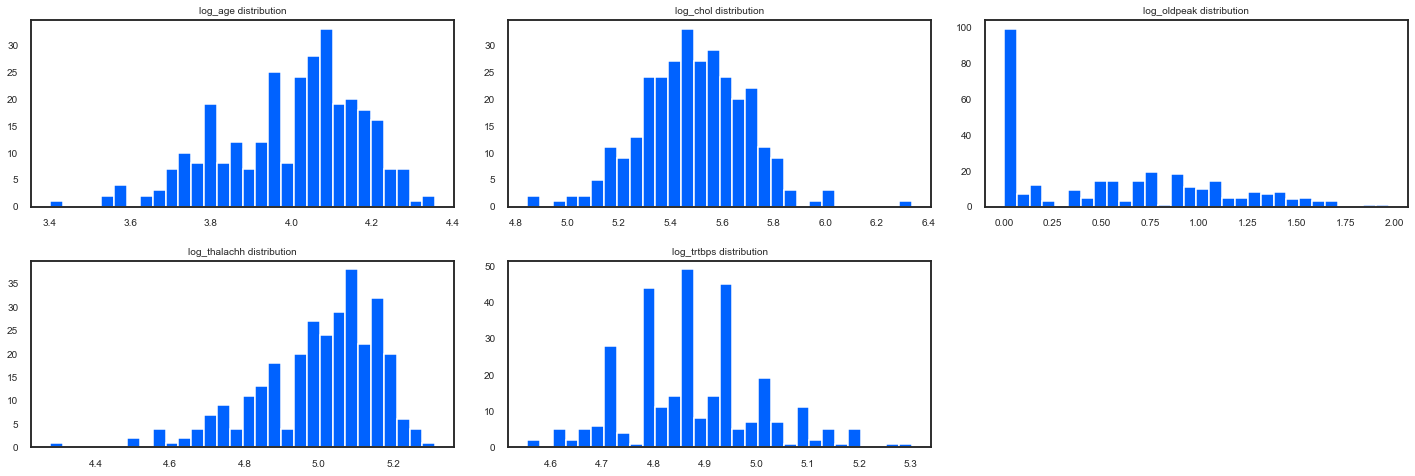

In [13]:
log_df = Heart_Data_num.filter(regex='^log_', axis=1)
hist_loop(data=log_df,
          rows=3,
          cols=3,
          figsize=(20,10))


Heart_Data_num_log=Heart_Data_num.drop(columns=['age','chol','trtbps','thalachh','oldpeak'])

In [14]:
#Join log data with categorical data
Heart_Data=Heart_Data.drop(columns=['age','chol','trtbps','thalachh','oldpeak'])
Heart_Data_Fin=Heart_Data.join(Heart_Data_num_log)
Heart_Data_Fin.to_csv('Heart_Data_Clean.csv',index='False')


## Hypothesis Testing
We can test for example that age and cholesterol levels have the same mean using a t-student test.

In [15]:
#Hypothesis Testing 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, t
import math

s1= Heart_Data_Fin['log_age']
s2= Heart_Data_Fin['log_chol']

result = ttest_ind(s1, s2, equal_var=False)
print("t-value" + " "+ str(result.statistic))
print("p-value" + " " + str(result.pvalue))

t-value -97.56842960009759
p-value 0.0


Other test can be done age against resting blood pressure (“trtbps”)

In [16]:
s3= Heart_Data_Fin['log_age']
s4= Heart_Data_Fin['log_trtbps']

result2 = ttest_ind(s3, s4, equal_var=False)
print("t-value" + " "+ str(result2.statistic))
print("p-value" + " " + str(result2.pvalue))

t-value -71.23724124308912
p-value 3.0305521351436204e-283


These tests show that in both case we reject the null hypothesis

# Regression Models
The objective of this section is to be able to define a model to predict if a patient can
have an heart attack based on some heart parameters


## Train / Test Split
As first step we proceed to split the dataset in Train and Test Split and the using a
k-fold cross validation in order to prevent overfitting.

In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


#Regression  
x=Heart_Data_Fin.drop(columns='output')
y=Heart_Data_Fin['output']
print(y)
#K-Fold
kf = KFold(shuffle=True, random_state=72018, n_splits=3)


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


## Finding The Best Model
Now we proceed to test some regression model to find witch better perform with our
data set

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
#Linear Regression
# vanilla regression and K-fold cross validation
s = StandardScaler()
lr = LinearRegression()
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test = (x.iloc[train_index, :], 
                                        x.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

# with pipeline
estimator = Pipeline([("scaler", s),("regression", lr)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf)
linear_score = r2_score(y_train, predictions_lr)

linear_score, score #almost identical

(0.489701786360916, 0.4407267177874896)

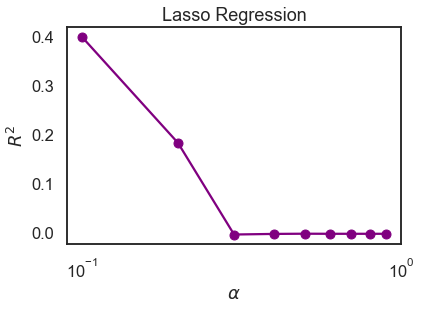

In [19]:
#Adding Polynomial Tranformations

# lasso regression and K-fold cross validation
s = StandardScaler()
pf = PolynomialFeatures(degree=2)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
scores = []
alphas = np.arange(10e-2, 1, 0.1)
predictions_lsr = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_lsr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions_lsr)
    
    scores.append(score)
plt.semilogx(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [20]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X_train, y_train)
lasso_score = best_estimator.score(X_train, y_train)
lasso_score

0.642254116840471

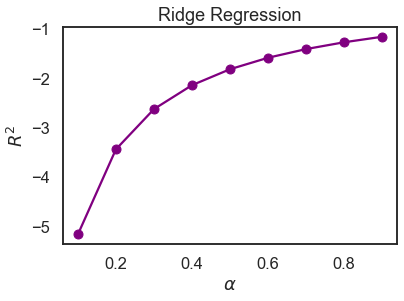

In [21]:
# ridge regression and K-fold cross validation
pf = PolynomialFeatures(degree=2)
alphas = np.arange(10e-2, 1, 0.1)
scores=[]
predictions_rr = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions_rr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_rr)
    scores.append(score)

plt.plot(alphas, scores, '-o', color='purple')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [22]:

best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator.fit(X_train, y_train)
ridge_score = best_estimator.score(X_train, y_train)
# comparing scores
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])

,linear,lasso,ridge
score,0.489702,0.642254,0.899014


In [23]:
#Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
#Dataframe for metrics
metrics = pd.DataFrame()

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

precision_lr, recall_lr = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_lr,
                                                                    average='weighted'))[:-2])
# writing all lr stats to metrics DataFrame
lr_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':round(accuracy_score(y_test, y_pred_lr), 2),
                      'f1score':round(f1_score(y_test, y_pred_lr), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_lr),2)},
                     name='Logistic Regression')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.808511,0.796296
recall,0.775510,0.826923
f1-score,0.791667,0.811321



## Final Thoughts
Due to the high number of parameters the ridge regression performs better in
estimate . Probably this is more a classification problem so another algorithm can get
more precise and significative resultis

In [24]:
#K Nearest Neighbors model

knn=KNeighborsClassifier(n_neighbors=3 , weights='distance')
knn = knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
precision_knn, recall_knn = (round(float(x),2) for x in list(score(y_test,y_pred_knn,average='weighted'))[:-2])
# adding KNN stats to metrics DataFrame
knn_stats = pd.Series({'precision':precision_knn,
                      'recall':recall_knn,
                      'accuracy':round(accuracy_score(y_test, y_pred_knn), 2),
                      'f1score':round(f1_score(y_test, y_pred_knn), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_knn),2)}, name='KNN')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.780000,0.803922
recall,0.795918,0.788462
f1-score,0.787879,0.796117


# Classification Models
In the previous step we suppose that this is more a classification problem so in this section we try to find the best model to classificate if a patient has an heart attack
## Finding the best model 
For this analysis we need to compare scores between some classfication models,
those models are : Logistic Regression , KNN , Decision Tree and Random Forest.
To compare this models we are going to plot their confusion matrix and compare their
scores.



## Decision Tree Classifier
For this model , first we have to find the best number of trees that minimize the OOB (out of
the bag error) in this model is around 800 trees , but i choose to use 200 trees because of
the computational work .

In [25]:

# Initialize the random forest estimator
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# initialise list for out of bag error
oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500 ,600 , 700, 800 , 900,1000,1200,1900]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)
    
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Get the out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

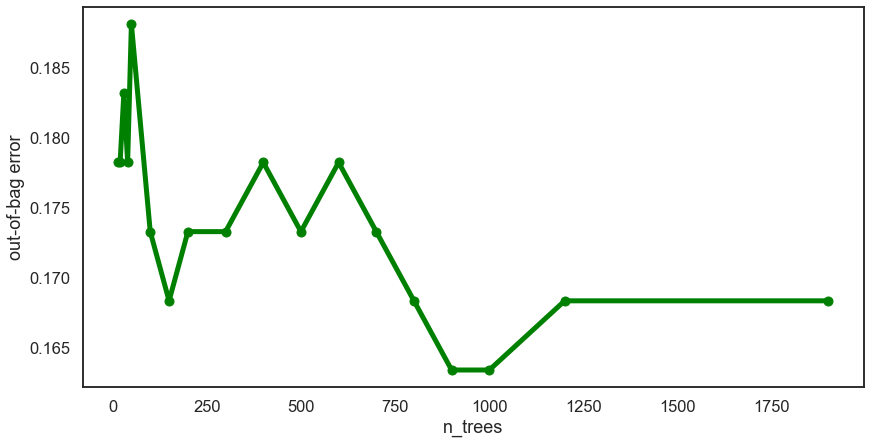

In [26]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', color="green", figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

Then we use the chosen number of trees in the model

In [27]:
rf = RF.set_params(n_estimators=200)

y_pred_rf = rf.predict(X_test)
precision_rf, recall_rf = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_rf,
                                                                    average='weighted'))[:-2])
rf_stats = pd.Series({'precision':precision_rf,
                      'recall':recall_rf,
                      'accuracy':round(accuracy_score(y_test, y_pred_rf), 2),
                      'f1score':round(f1_score(y_test, y_pred_rf), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_rf),2)}, name='Random Forest')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.812500,0.811321
recall,0.795918,0.826923
f1-score,0.804124,0.819048


In [28]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(71, 10)

In [29]:

y_train_pred = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

precision_dt, recall_dt = (round(float(x),2) for x in list(score(y_test,
                                                                y_pred_dt,
                                                                average='weighted'))[:-2])
# adding dt stats to metrics DataFrame
dt_stats = pd.Series({'precision':precision_dt,
                      'recall':recall_dt,
                      'accuracy':round(accuracy_score(y_test, y_pred_dt), 2),
                      'f1score':round(f1_score(y_test, y_pred_dt), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_dt),2)}, name='Decision Tree')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.652174,0.654545
recall,0.612245,0.692308
f1-score,0.631579,0.672897


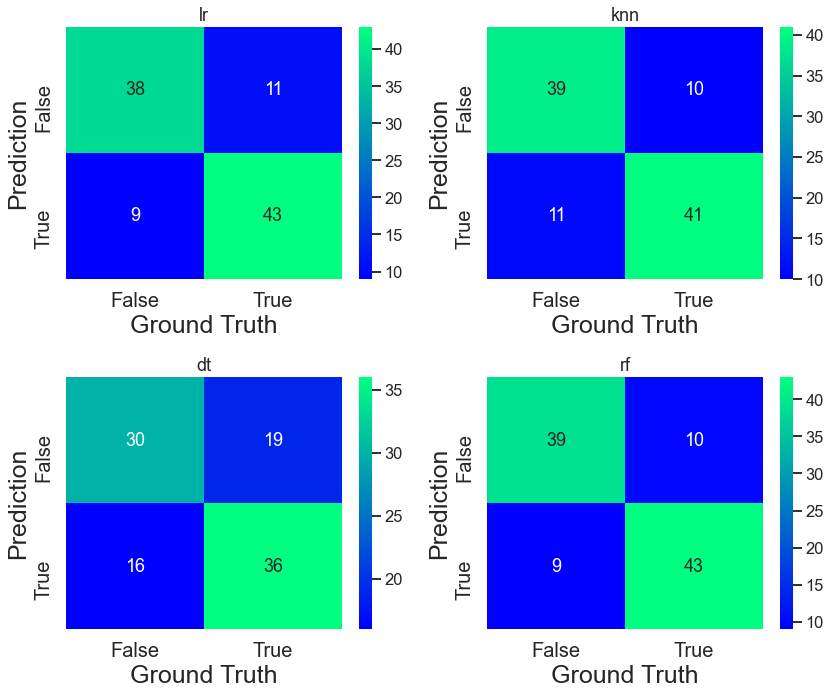

In [30]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ['lr', 'knn', 'dt', 'rf']
cm = [confusion_matrix(y_test, y_pred_lr),
      confusion_matrix(y_test, y_pred_knn),
      confusion_matrix(y_test, y_pred_dt),
      confusion_matrix(y_test, y_pred_rf)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='winter');
    ax.set(title=model);
    ax.set_xticklabels(labels, fontsize=20);
    ax.set_yticklabels(labels, fontsize=20);
    ax.set_ylabel('Prediction', fontsize=25);
    ax.set_xlabel('Ground Truth', fontsize=25)
    
plt.tight_layout()

## Results and Findings
I have decided to put all scores from each model in a dataset to better understand
the differences among all models.

In [31]:
metrics.append([lr_stats, knn_stats, dt_stats, rf_stats])

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.80,0.80,0.80,0.81,0.80
KNN,0.79,0.79,0.79,0.80,0.79
Decision Tree,0.65,0.65,0.65,0.67,0.65
Random Forest,0.81,0.81,0.81,0.82,0.81


The best models seems to be the random forest and the logistic regression and KNN
the only one with significantly low scores is the decsion tree classifier caused by a
large numver of features.Maybe with some boosting algorithms  or more data we could have even
more accurate models .